https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

In [13]:
# Load Python Libraries
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from time import time
# %matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import csv

In [40]:
def tsne(word):
    tokens = []
    with open('data/derived/bnc_words_with_context_tokens_and_vectors.csv', mode="r") as infile:
        # word sentence concreteness vector
        reader = csv.reader(infile, delimiter="\t")

        for row in reader:
            item = row[0]
            if item == word:
                tokens.append(row)
        df = pd.DataFrame.from_records(tokens, columns=["word", "text", "concreteness", "vector"])
        df["vector"] = df["vector"].apply(lambda x: np.fromstring(x[1:-1], dtype=np.float, sep=' '))

        # TSNE analysis
        vectors = df.get("vector")
        x = vectors.to_numpy()
        x = x.tolist()
        model = TSNE(n_components=2, random_state=0)
        res = model.fit_transform(x)
        return res


In [65]:
def multi_tsne(array):
    all_vectors = []
    for item in array:
        tokens = []
        with open('data/derived/bnc_words_with_context_tokens_and_vectors.csv', mode="r") as infile:
            # word sentence concreteness vector
            reader = csv.reader(infile, delimiter="\t")

            for row in reader:
                item = row[0]
                if item == word:
                    tokens.append(row)
            df = pd.DataFrame.from_records(tokens, columns=["word", "text", "concreteness", "vector"])
            df["vector"] = df["vector"].apply(lambda x: np.fromstring(x[1:-1], dtype=np.float, sep=' '))
        vectors = df.get("vector")
        x = vectors.to_numpy()
        x = x.tolist()
        all_vectors = all_vectors + x
        # TSNE analysis

        model = TSNE(n_components=2, random_state=0)
        res = model.fit_transform(all_vectors)
        return res

In [43]:
def tsne_plot(res):
    #res = tsne(word) 
    pd_res = pd.DataFrame(res[0:, 0:,])
    plt.scatter(pd_res[0], pd_res[1])


In [41]:
carrot = tsne("carrot")
print("TSNE 'carrot'")
print(carrot)

democracy = tsne("democracy")
print("TSNE 'democracy'")
print(democracy)

TSNE 'carrot'
[[ -28.370157    75.71671  ]
 [ 140.52513    125.03842  ]
 [ -15.713381    -6.499068 ]
 [ -34.62474    168.42976  ]
 [  66.22931      7.8045106]
 [  54.002045    90.614914 ]
 [-115.58011    108.73042  ]
 [ 156.04005     31.690395 ]
 [  31.304781   -90.66338  ]
 [ 125.5231     -64.16011  ]
 [-110.48108     11.01104  ]
 [  58.76603    183.60706  ]
 [ -69.45769    -81.489365 ]]
TSNE 'democracy'
[[-40.314583   23.74341  ]
 [-74.49373    18.079088 ]
 [ 39.54531   -32.39363  ]
 [ 19.38754   -37.108494 ]
 [  3.0296495 -11.108758 ]
 [-17.494259    5.415805 ]
 [-17.626143  -66.91501  ]
 [-23.073845  -53.876682 ]
 [  2.7600112 -71.202415 ]
 [ -8.921018  -36.908115 ]
 [  5.2092752 -26.11057  ]
 [ 18.337454   87.86336  ]
 [  1.1011461 -50.372265 ]
 [ 51.277046  -52.470207 ]
 [ 75.43549   -67.18748  ]
 [-41.1376     68.56786  ]
 [ 15.69053    -1.820374 ]
 [-15.083101  -15.177468 ]
 [-26.550333   80.47925  ]
 [  0.9849336  30.27619  ]
 [ 23.536472  -57.165997 ]
 [-36.790916   -7.100956

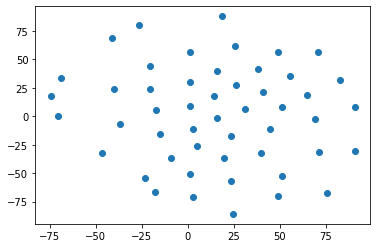

In [49]:
tsne_plot(democracy)

In [15]:
# get all tokens for carrot

carrots = []
with open('data/derived/bnc_words_with_context_tokens_and_vectors.csv', mode="r") as infile:
    # word sentence concreteness vector
    reader = csv.reader(infile, delimiter="\t")
    
    for row in reader:
        word = row[0]
        if word == "carrot":
            carrots.append(row)
    df = pd.DataFrame.from_records(carrots, columns=["word", "text", "concreteness", "vector"])
    df["vector"] = df["vector"].apply(lambda x: np.fromstring(x[1:-1], dtype=np.float, sep=' '))


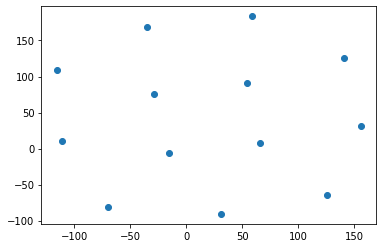

In [50]:
tsne_plot(carrot)

[[ -85.27862     -3.1057212]
 [  71.14989     76.95207  ]
 [   8.001173   -59.77496  ]
 [   3.1059752   31.65203  ]
 [  78.2639      48.759274 ]
 [  40.936405   -25.786777 ]
 [   9.978284   -26.657343 ]
 [  24.464165     2.2111418]
 [ -24.821573    59.58739  ]
 [  73.69209    -19.959314 ]
 [ -68.198654    40.11976  ]
 [ -11.861208    -2.4298947]
 [ -21.958368   -36.17331  ]
 [ 101.3247      12.475904 ]
 [ -67.317345   101.926186 ]
 [  42.885536   -66.50522  ]
 [ -99.70525    -79.72925  ]
 [-114.41797    -47.87591  ]
 [  11.165415    65.17613  ]
 [ -46.63514     -2.818085 ]
 [ -55.905388    88.16666  ]
 [  39.05601    116.54521  ]
 [  49.5789      69.6389   ]
 [  35.38243     37.949013 ]
 [  61.16122     14.218825 ]
 [  -3.2011528  101.78344  ]
 [  80.85219    -59.75756  ]
 [ 116.99809    -29.306602 ]
 [ -61.295227   -41.826668 ]
 [ -48.744595  -109.67799  ]
 [  35.03495   -109.651985 ]
 [  -3.83245    -95.73355  ]
 [ -40.14807    -74.185455 ]
 [ -32.540825    26.792587 ]]


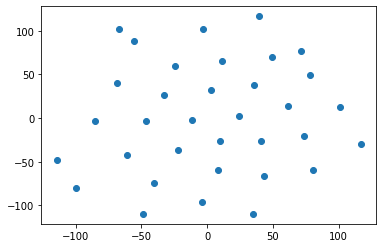

In [67]:
# print(carrot)
# #concat = carrot.tolist() + democracy.tolist()
# concat = np.concatenate((carrot, democracy), axis=0)
# print()
# print(concat)
# tsne_plot(concat)

res = multi_tsne(["carrot", "democracy"])
print(res)
tsne_plot(res)

In [16]:
df

,word,text,concreteness,vector
0,carrot,"‘ One board , one knife , one hand , ’ he comm...",5.0,"[-3.13301611, 0.844459772, -0.687739611, 1.665..."
1,carrot,Stir-fried beef with carrot and onion is one d...,5.0,"[-3.80470324, -1.56915212, 0.130740449, 1.2520..."
2,carrot,He overcomes its characteristic darkening duri...,5.0,"[-0.79287404, -0.59802788, -0.5599798, 0.42352..."
3,carrot,After the big stick came the carrot : he offer...,5.0,"[-3.99658966, -2.19273448, 0.758629322, -0.109..."
4,carrot,"Make a final sowing of an early carrot , such ...",5.0,"[0.214228868, -1.93550003, 0.492152333, 2.2184..."
5,carrot,Poke a carrot into beds containing old meadow ...,5.0,"[-2.2513726, -0.70883232, 0.70210552, 2.505317..."
6,carrot,"The carrot will attract any wireworm around , ...",5.0,"[-3.7777066, -1.7532078, -0.31888121, 1.500869..."
7,carrot,Wild seeds needing chilling before germination...,5.0,"[-2.22468519, -1.01884639, 1.51493955, -0.8629..."
8,carrot,Some pests live temporarily on alternative hos...,5.0,"[-2.4644086, -0.079895824, -0.72274685, -0.615..."
9,carrot,Two days ago when they had carted out Menzies ...,5.0,"[-2.7903523, 0.59702641, -0.079705581, 1.44150..."


In [21]:
vectors = df.get("vector")
print(vectors)

print("number of carrot examples: %s" % len(carrots))

vectors[0]

0     [-3.13301611, 0.844459772, -0.687739611, 1.665...
1     [-3.80470324, -1.56915212, 0.130740449, 1.2520...
2     [-0.79287404, -0.59802788, -0.5599798, 0.42352...
3     [-3.99658966, -2.19273448, 0.758629322, -0.109...
4     [0.214228868, -1.93550003, 0.492152333, 2.2184...
5     [-2.2513726, -0.70883232, 0.70210552, 2.505317...
6     [-3.7777066, -1.7532078, -0.31888121, 1.500869...
7     [-2.22468519, -1.01884639, 1.51493955, -0.8629...
8     [-2.4644086, -0.079895824, -0.72274685, -0.615...
9     [-2.7903523, 0.59702641, -0.079705581, 1.44150...
10    [-2.03095007, -0.809866369, 1.51749563, 2.3177...
11    [-5.9392214, -0.18154508, -0.33929926, 1.30826...
12    [-4.1128941, -1.8411874, -0.16004278, 1.369448...
Name: vector, dtype: object
number of carrot examples: 13


array([-3.13301611e+00,  8.44459772e-01, -6.87739611e-01,  1.66532695e+00,
        2.10455179e+00, -2.42590785e+00, -6.67478085e-01,  6.55754709e+00,
       -2.41384435e+00, -1.35384274e+00, -3.55026454e-01, -2.08948803e+00,
        9.47228014e-01,  1.89320755e+00, -1.70576811e+00,  4.40515757e+00,
        4.27159309e+00,  2.66906881e+00, -4.17392778e+00,  1.70238924e+00,
        4.59815407e+00,  6.23220801e-02,  1.23093867e+00,  1.08870769e+00,
        4.03376865e+00, -3.95797282e-01,  3.46162021e-01, -1.39308572e-01,
        1.57490277e+00, -9.06431496e-01, -1.17149270e+00,  1.76994324e-01,
        5.44036341e+00,  8.32297206e-01, -1.47161448e+00, -1.59466195e+00,
       -6.01747322e+00,  7.51760125e-01,  9.20082629e-01, -1.66657650e+00,
       -4.21465588e+00,  1.44873524e+00,  9.98324692e-01,  4.25218582e+00,
        6.57613993e+00, -1.24623859e+00, -4.55480289e+00, -4.03570604e+00,
        7.65365124e-01, -1.42101586e+00, -2.28577995e+00,  2.44156098e+00,
       -2.70620203e+00, -

[array([-3.13301611e+00,  8.44459772e-01, -6.87739611e-01,  1.66532695e+00,
        2.10455179e+00, -2.42590785e+00, -6.67478085e-01,  6.55754709e+00,
       -2.41384435e+00, -1.35384274e+00, -3.55026454e-01, -2.08948803e+00,
        9.47228014e-01,  1.89320755e+00, -1.70576811e+00,  4.40515757e+00,
        4.27159309e+00,  2.66906881e+00, -4.17392778e+00,  1.70238924e+00,
        4.59815407e+00,  6.23220801e-02,  1.23093867e+00,  1.08870769e+00,
        4.03376865e+00, -3.95797282e-01,  3.46162021e-01, -1.39308572e-01,
        1.57490277e+00, -9.06431496e-01, -1.17149270e+00,  1.76994324e-01,
        5.44036341e+00,  8.32297206e-01, -1.47161448e+00, -1.59466195e+00,
       -6.01747322e+00,  7.51760125e-01,  9.20082629e-01, -1.66657650e+00,
       -4.21465588e+00,  1.44873524e+00,  9.98324692e-01,  4.25218582e+00,
        6.57613993e+00, -1.24623859e+00, -4.55480289e+00, -4.03570604e+00,
        7.65365124e-01, -1.42101586e+00, -2.28577995e+00,  2.44156098e+00,
       -2.70620203e+00, 

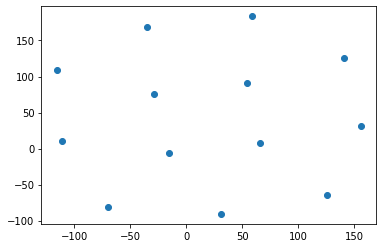

In [34]:
# TSNE and plot carrot

x = vectors.to_numpy()
x = x.tolist()
model = TSNE(n_components=2, random_state=0)
res = model.fit_transform(x)
print(res)

pd_res = pd.DataFrame(res[0:, 0:,])
plt.scatter(pd_res[0], pd_res[1])
